# Route Choice based on Hyperpath in Schedule-based Transit Networks
## Contributors

*Written June 2017; Modified and published in Jupyter January 2018*

 - Alireza Khani, Assistant Professor at University of Minnesota  
 - Elizabeth Sall, UrbanLabs LLC
 


## Introduction
Similar to traffic assignment models, where the flow of vehicles in a roadway network is modeled as a function travel demand and road network capacity, transit assignment models also capture the flow of passengers in a transit network.

Specifically, given the transit demand in an origin-destination matrix and the transit supply in terms of the network of routes, stops, and service characteristics, transit assignment models try to replicate the paths that travelers are likely to take to go from their origin to their destination. 

The path would include access to and egress from transit stops, waiting at the boarding stops, riding a particular route, transferring to another route, and so on. A dynamic - or more accurately a schedule-based - transit assignment is a more detailed version of transit assignment in which service characteristics and potentially demand may change in time. 

While transit service is traditionally modeled by route frequency, schedule-based transit assignment models take into account the service schedule that may vary during the day. Similarly, passenger demand may change in time including peak periods and even variation within peak periods. The schedule-based models are more accurate in capturing travelers behavior, in terms of route, stop, and departure time choice.


**Figure 1**
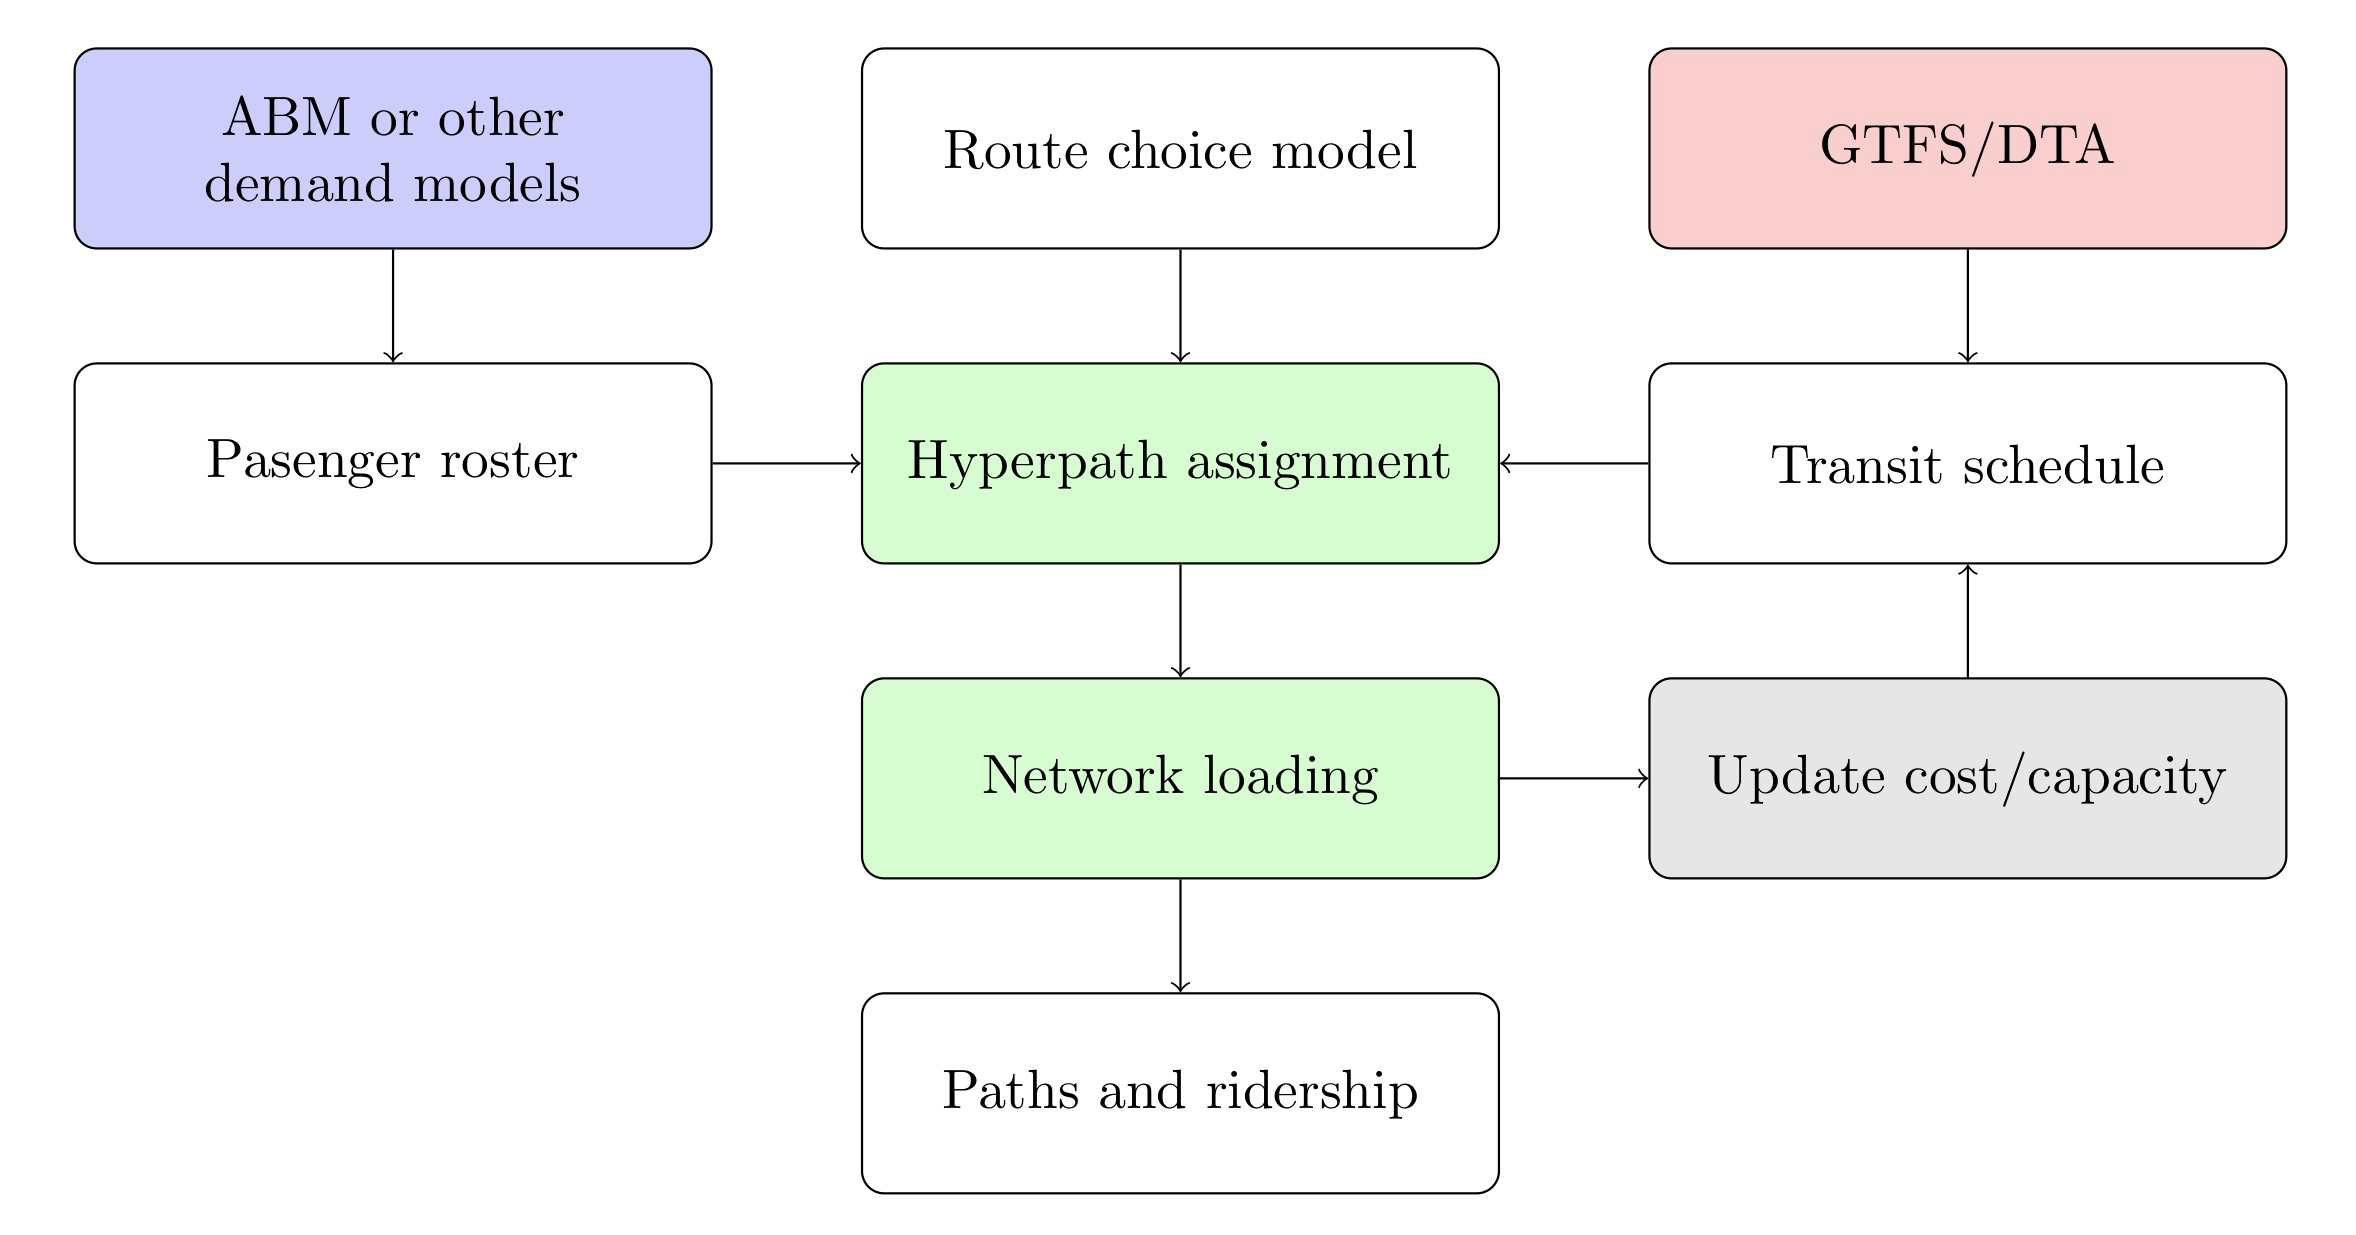

Schedule-based transit assignment, when modeling individual passengers, is compatible with activity-based travel demand models. Indeed, origin, destination, departure/arrival time are determined in a higher resolution in activity-based models and route choices given these parameters is better modeled by a schedule-based transit assignment model. Moreover, the information from transit schedule and perceived level of service can feed activity-based models for further calibration of activity and travel data. Schedule-based transit assignment models are also more accurate in estimating travel time and transfer waiting times due to high resolution schedule data. This is analogous to dynamic traffic assignment (DTA) models in modeling varying capacity and level of service. Indeed, integration of the two models would greatly benefit both.

This document is an effort to provide general knowledge about schedule-based transit assignment models. First, hyperpath as the main modeling element is introduced in Section 2, followed by schedule-based hyperpath in transit networks, in Section 3. The effect of route overlapping is explained in Section 4 along with an example using a path-size correction factor. Finally, an overview of the complete transit assignment framework is presented in Section 5. Table 1 shows the list of variables and their definitions.

**Table 1.  Variable Definitions**

Variable | Definition  
 ----- | :-----
$G$ |  The graph representing a transit network   
$N$ |  The set of nodes in graph $G$  
$A$ |  The set of links in graph $G$  
$i,j$ |  The index for representing nodes  
$r$ |  The [origin](https://fast-trips.github.io/dtpa-glossary/terms/origin/) node  
$s$ |  The [destination](https://fast-trips.github.io/dtpa-glossary/terms/destination/) node  
$ij$ |  The link staring from node $i$ and ending in node $j$  
$k$ |  The index for representing link type or travel time component, e.g. in-vehicle, walking, etc.   
$t_{ij}^k$ |  The travel time of link $ij$ with type $k$  
$B_i$ |  The [set of nodes immediately before](https://fast-trips.github.io/dtpa-glossary/terms/upstream-node) node $i$  
$pi$ |  The index for representing paths  
$delta_{ijpi}$ |  A binary indicating whether link $ij$ is on path $pi$  
$w^k$ |  The coefficient of component $k$ in the utility function  
$c_{pi}$ |  The generalized cost of path $pi$  
$u_i$ |  The utility of the hyperpaths from node $i$ to destination   
$theta$ |  The route choice model's dispersion parameter. $theta>0$ and its higher values   would result in higher probability of taking the shortest path.    
$C$ |  The path choice set  
$h_{pi}$ |  The flow on path $pi$  
$x_{ij}$ |  The flow on link$ij$   
$d_{rs}$ |  The demand from origin $r$ to destination $s$  
$beta_i$ |  The probability of node $i$ in the hyperpath  
$P_{ij}$ |  The conditional probability of taking link $ij$ from node $i$ in the hyperpath  
$gamma_{ij}$ |  The global probability of traversing link $ij$ in the hyperpath   
$S_{pi}$ |  The path-size correction factor   
$gamma$ |  The overlap scale parameter. Its higher values represent the lower effect of  path length on overlapping factor   


## Hyperpath in a Network
Transportation network is modeled by network $G(N,A)$, where $N$ is the set of nodes and $A$ is the set of links. $i$ is the index for node and $ij$ represents a link from node $i$ to node $j$. Travel time of link $ij$ is represented by $t_{ij}$. A path $\pi$ is a sequence of links from origin node $r$ to destination node $s$, for instance $\{ri_1, i_1i_2, ... i_ns\}$. In a transit network where links may have different types $k \in$ \{in-vehicle, waiting, walking, ...\}, link travel times can be represented by $t_{ij}^k$ where $k$ indicates the type of the link. Assuming a weighting coefficient $w^k$ for time component $k$, the generalized travel cost of a path will be:
\begin{align}
	& c_{\pi} = \sum\limits_{ij\in\pi}{w^kt_{ij}^k} &
\end{align}

Path flow in path $\pi$ is represents by $h_{\pi}$ and link flow in link $ij$ is represented by $x_{ij}$. Knowing the set of paths that include link $ij$, the following relationship translates the path flows to link flows (note that the reverse does not hold):
\begin{align}
& x_{ij} = \sum\limits_{\pi\in {ij}}{h_{\pi}} &
\end{align}

Travel demand in OD pair $rs$ is represented by $d_{rs}$.

In a hyperpath model \cite{nguyen1988equilibrium,spiess1989optimal}, two sets of probabilities are used: node probabilities $\beta_i$ and link probabilities $\gamma_{ij}$. $\beta_i$ represents the probability that a traveler visits node $i$ during their trip from origin to destination. Similarly, $\gamma_{ij}$ represents the probability that link $ij$ is on a traveler's path from their origin to destination. Defining $p_{ij}$ as the conditional probability of choosing link $ij$ among the links emanating from $i$, the following relationship holds:
\begin{align}
	& \gamma_{ij} = \beta_i p_{ij} &
\end{align} 

Moreover, the node probabilities can be defined by the sum of the incoming link probabilities:
\begin{align}
& \beta_j = \sum\limits_{i\in B_j}{\gamma_{ij}} = \sum\limits_{i\in B_j}{\beta_i p_{ij}} &
\end{align}
where $B_j$ is the set of nodes immediately before node $j$ and connected to it with link $ij$. By definition, the node probability of the origin and the destination nodes are $\beta_r=1$ and $\beta_s=1$. Equation (4) makes a recursive relationship between node probabilities given the conditional link probabilities $p_{ij}$. In Figure 2, the hyperpaths in an abstract network are shown, including node and link probabilities. 

**Figure 2: hyperpath in a network. Top: the network with given link travel times, Middle: node probabilities and link conditional probabilities, Bottom: link probabilities (assignment)**
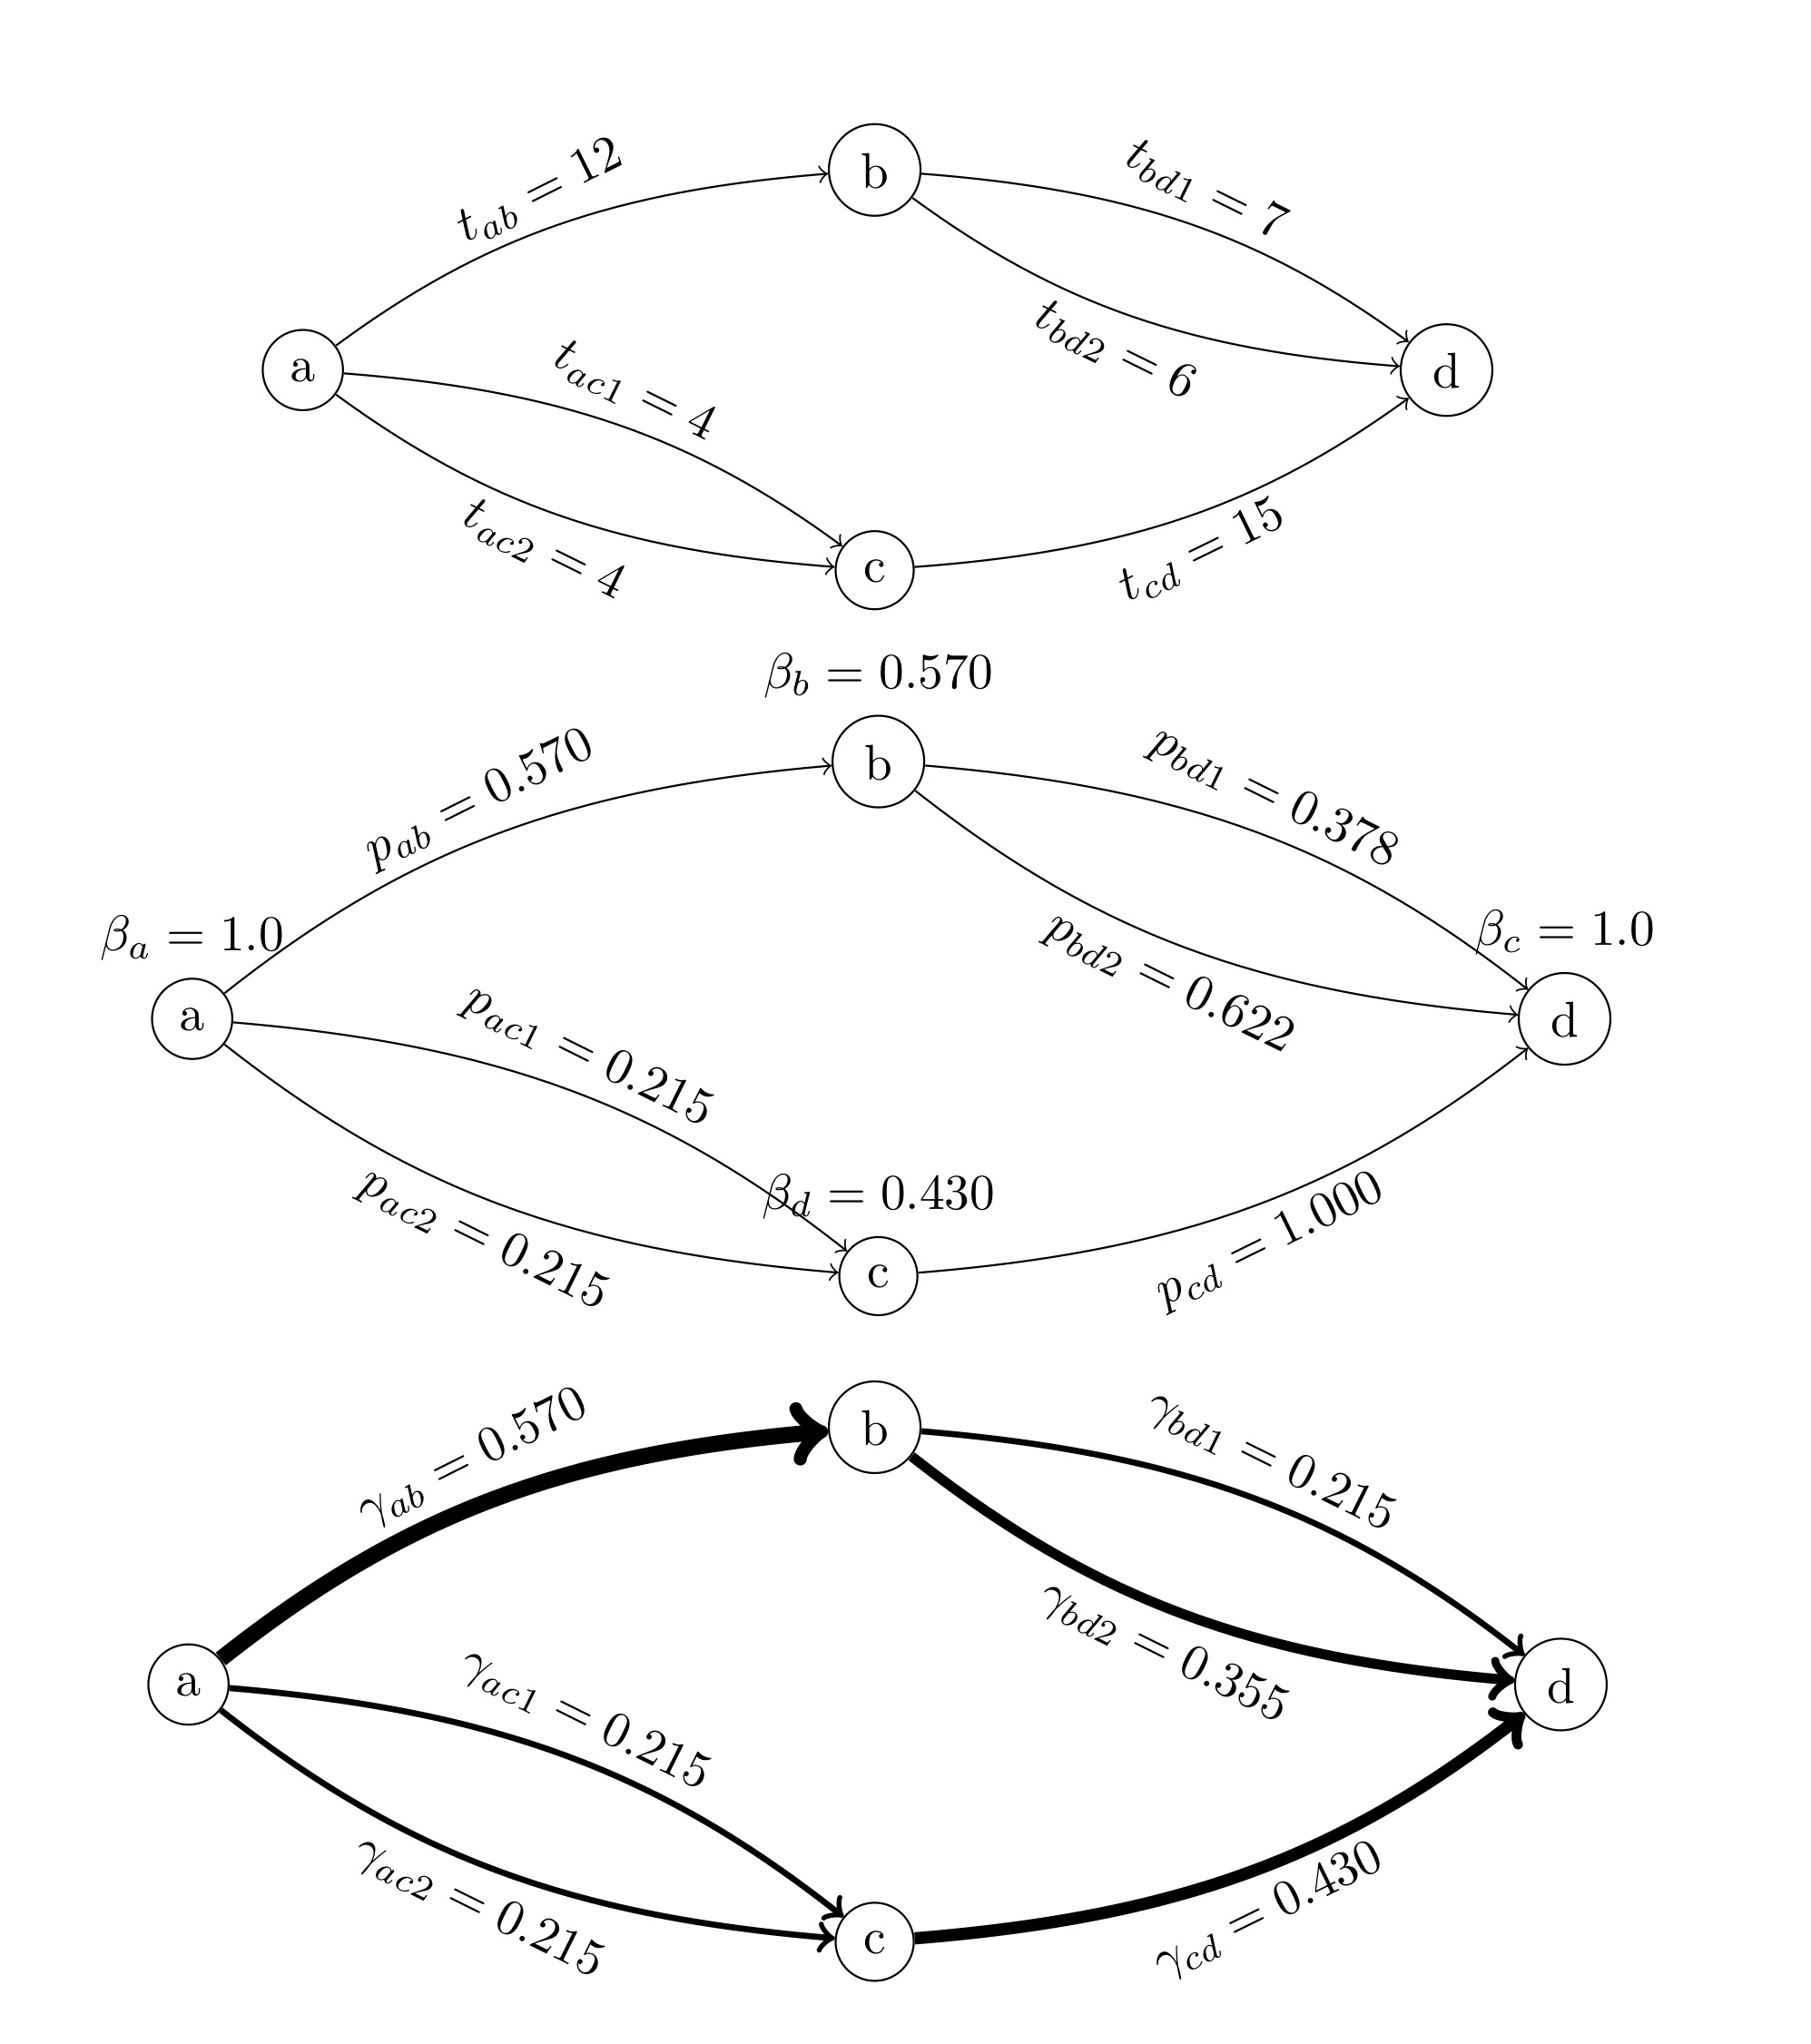

In the above example, the conditional probabilities for links are calculated using a nested logit model. 
### Utility Calculation
The logsum equation is used to calculate the utility of a hyperpath at each node. In the following system of equations, variables $u$, representing the utility of the hyperpath to the destination, are unknown and must be calculated. 
\begin{align}
& u_a = -\frac{1}{\theta}\ln(e^{-\theta(t_{ab}+u_b)}+e^{-\theta(t_{ac1}+u_c)}+e^{-\theta(t_{ac2}+u_c)}) & \\
& u_b = -\frac{1}{\theta}\ln(e^{-\theta(t_{bd1}+u_d)}+e^{-\theta(t_{bd2}+u_d)}) & \\
& u_c = -\frac{1}{\theta}\ln(e^{-\theta(t_{cd}+u_d)}) & \\
& u_d = 0 &
\end{align}

One can solve this system of equations recursively, which is known as labeling algorithm, and the solution for $\theta=0.5$ will be as follows. Note that when more than one path exist in the hyperpath, for example from node $b$ to the destination, the hyperpath cost is less than the cost of each path. This represents the higher utility due to higher accessibility from that node to the destination. 
\begin{align*}
& u_a = 15.927 & 
& u_b = 5.052 & 
& u_c = 15 & 
& u_d = 0 &
\end{align*}

### Link Probability Calculation
The link probabilities are then calculated using the utility values and the logit model, i.e., from node $a$:
\begin{align}
& p_{ab}  = \frac{e^{-\theta(t_{ab}+u_b)}} {e^{-\theta(t_{ab}+u_b)}+e^{-\theta(t_{ac1}+u_c)}+e^{-\theta(t_{ac2}+u_c)}} = 0.570 & \\
& p_{ac1} = \frac{e^{-\theta(t_{ac1}+u_c)}}{e^{-\theta(t_{ab}+u_b)}+e^{-\theta(t_{ac1}+u_c)}+e^{-\theta(t_{ac2}+u_c)}} = 0.215 & \\
& p_{ac2} = \frac{e^{-\theta(t_{ac2}+u_c)}}{e^{-\theta(t_{ab}+u_b)}+e^{-\theta(t_{ac1}+u_c)}+e^{-\theta(t_{ac2}+u_c)}} = 0.215 & 
\end{align}

### Node Probabilities
Finally, node probabilities $\beta$ and link probabilities $\gamma$ are calculated as shown in Figure 2.


## Schedule-based transit assignment

In a schedule-based transit network, links are time-dependent and are defined by transit vehicle trips serving transit stops. Therefore, the choice is not only among transit routes, but also among vehicle trips of the transit routes, given preferred departure time (PDT) or preferred arrival time (PAT) for the passenger trip.

In figure 2, a viable hyperpath consists of the second vehicle trip of the blue route and transferring to either the second vehicle trip of the red route or the third vehicle trip of the green route. Other combinations are not feasible or attractive due to late arrival, early departure, or infeasible/long transfers. Figure 3 shows the hyperpath in standard network format so that the link probabilities can be calculated. Using a logit choice model with the following path cost/disutility function:
\begin{align}
	& c_{\pi} = w^{IV} t^{IV} + w^{WK} t^{WK} + w^{WT} t^{WT} + w^{X} N^{X} &
\end{align}
where the coefficients are as below:
\begin{align*}
	& w^{IV} = 1.0 &
	& w^{WK} = 1.5 &
	& w^{WT} = 2.0 &
	& w^{X} = 5.0 &
\end{align*}
and $IV$ represents in-vehicle, $WK$ represents walking, $WT$ represents waiting, and $X$ represents transfer, the link and node probabilities are determined as shown in Figure 3. Note that early arrival is not included in the utility function.

**Figure 3. Hyperpath assignment in schedule-based transit network shown in Fig 2.**
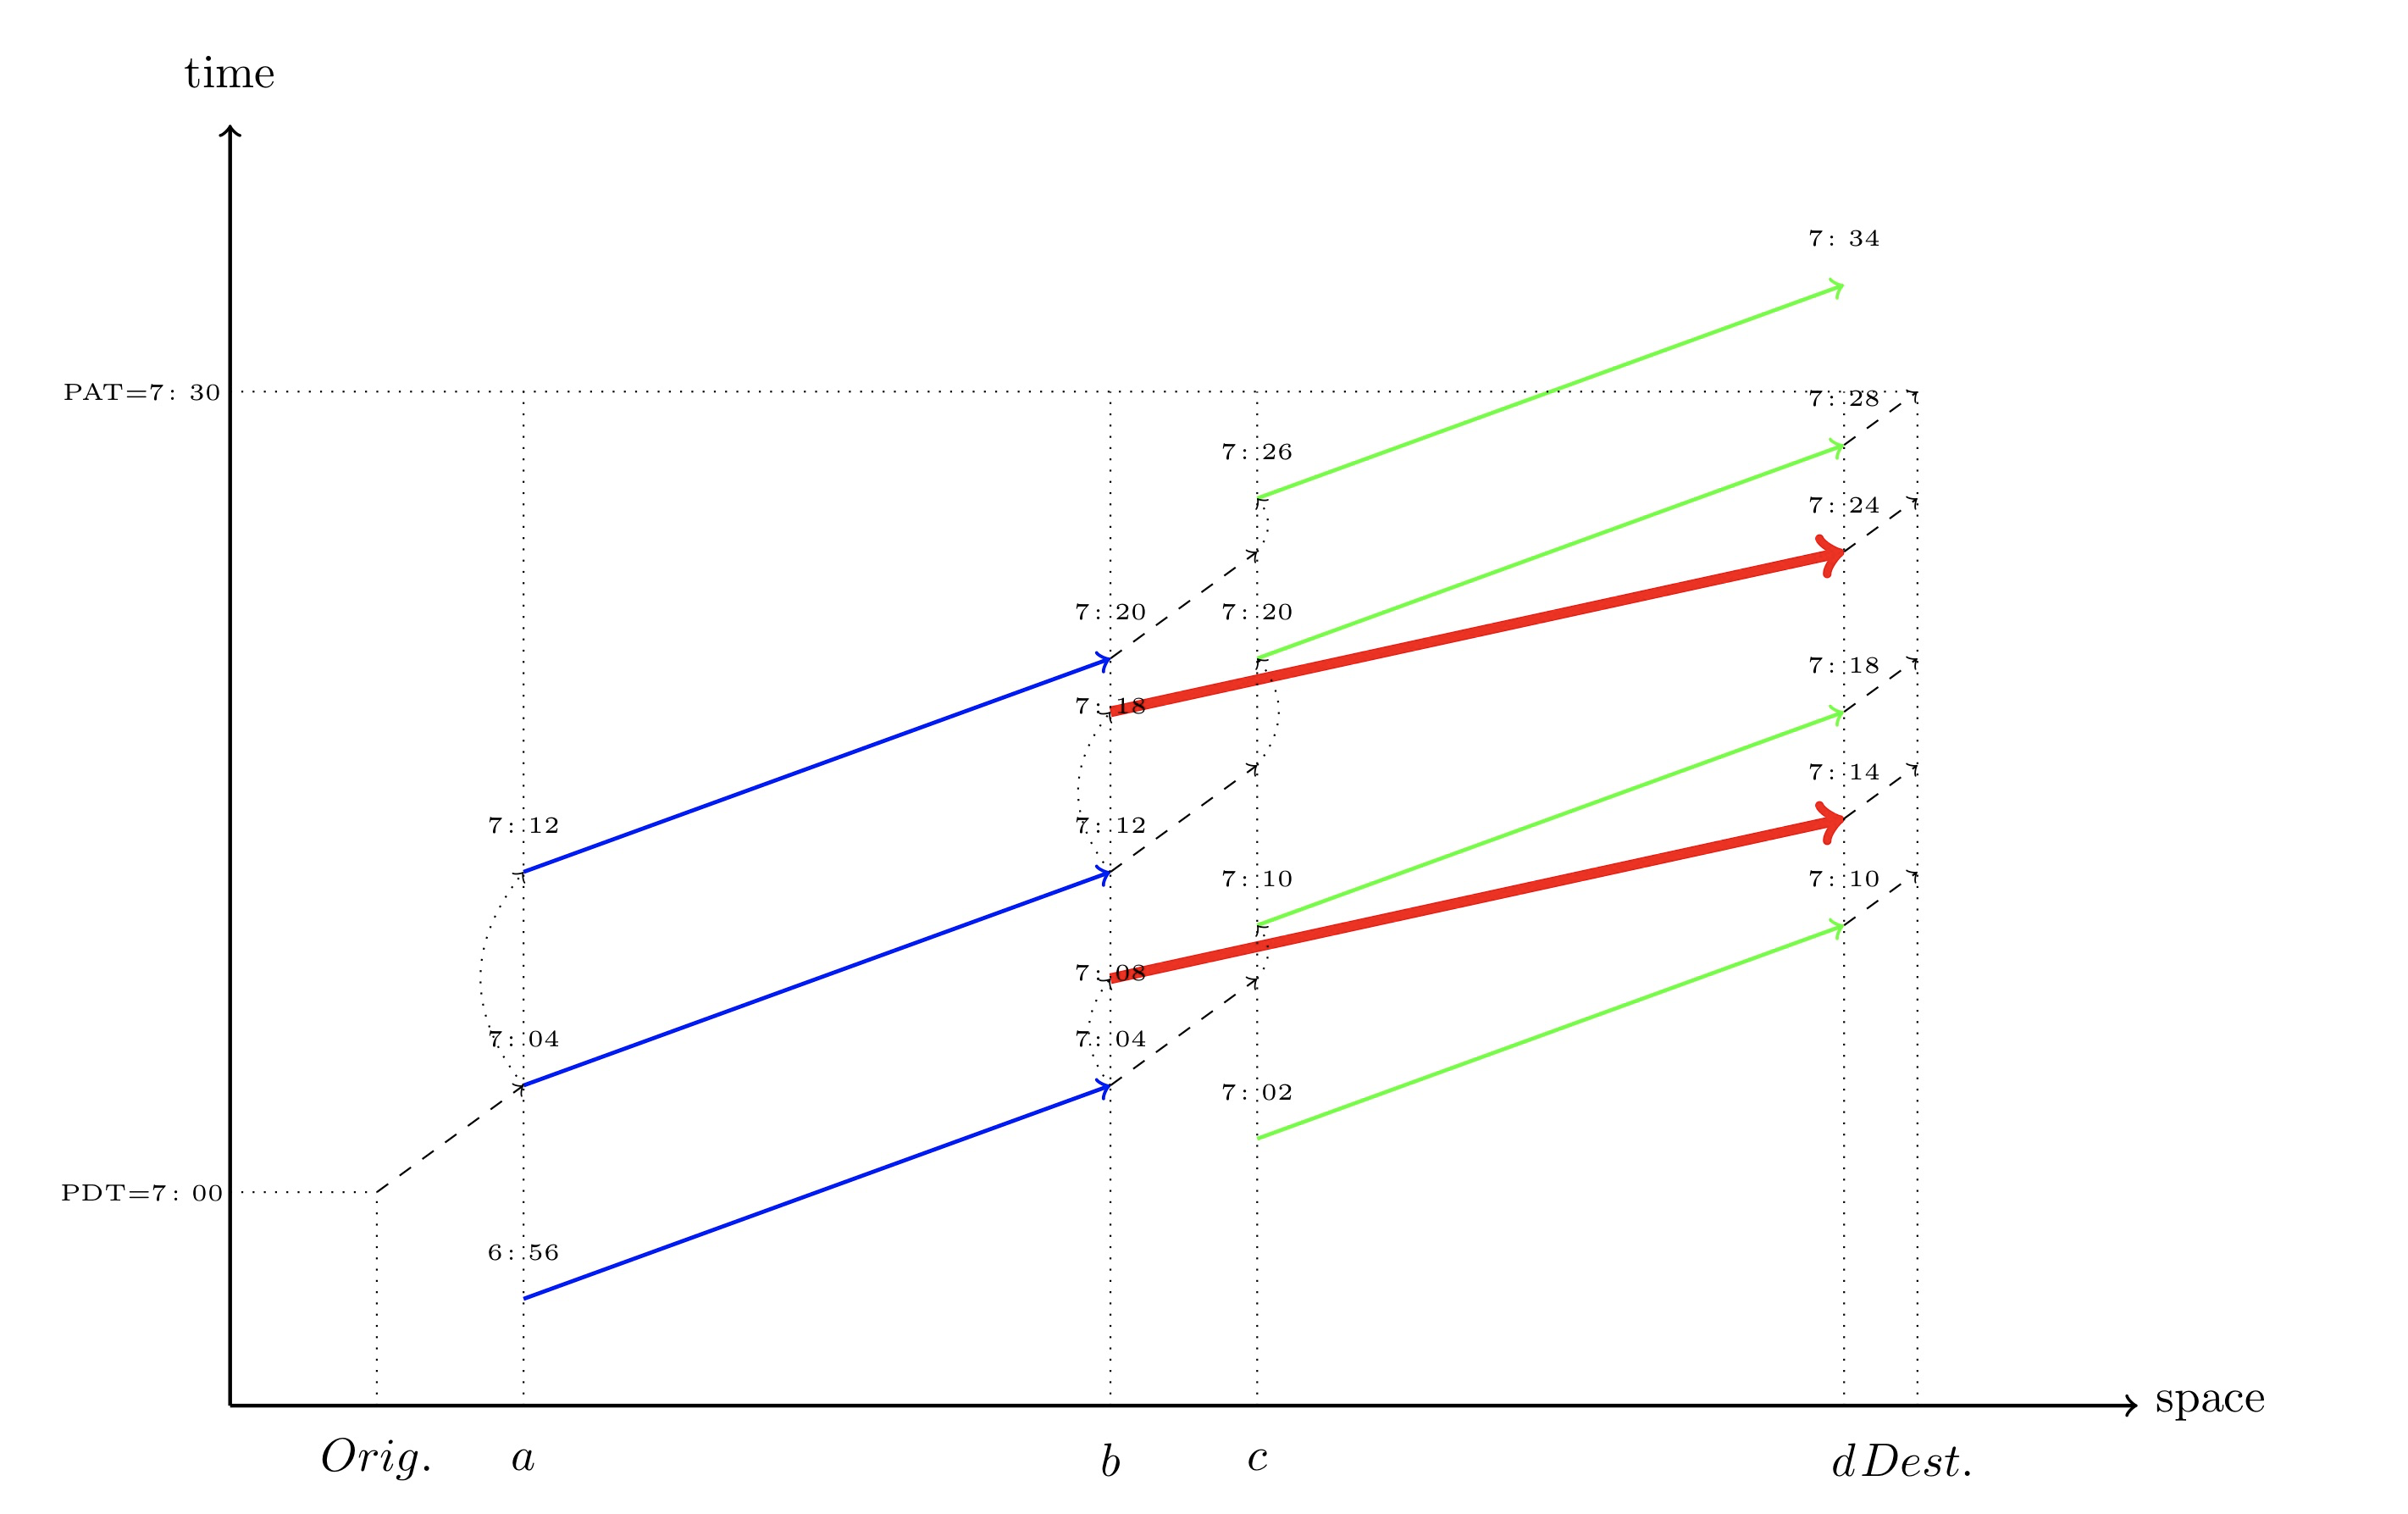

Looking at this problem from the path perspective, there are two \textit{elementary} paths: $\pi_1=$\{blue,red\} and $\pi_2=$\{blue,green\}. The path costs are
\begin{align*}
	& c_{\pi_1}=1(16)+1.5(10)+2(4)+5(1)=44 &
	& c_{\pi_2}=1(14)+1.5(6)+2(6)+5(1)=40 &  
\end{align*}

Applying the multinomial logit route choice model, the probability of each path will be:
\begin{align*}
	& p_{\pi_1}  = \frac{e^{-0.5(44)}} {e^{-0.5(44)}+e^{-0.5(40)}} = 0.119 &
	& p_{\pi_2}  = \frac{e^{-0.5(40)}} {e^{-0.5(44)}+e^{-0.5(40)}} = 0.881 &
\end{align*}

Having the path probabilities calculated, and given the demand in the OD pair, passenger assignment and ridership estimation follows. 


## Path Overlap
The (logit-based) hyperpath model may potentially suffer from the IIA property when paths overlap and share attributes. This is more likely to happen in schedule-based networks where vehicle trips of the same route are considered as independent paths but in fact have similar properties. To address this issue, several variations of logit model are proposed in the literature \cite{ramming2001network, hoogendoorn2005path}. Some examples of these models are C-logit, cross-nested logit, and path-size logit. In the path-size logit, correction terms for path overlapping are calculated and are added to the utility of the paths. 
\begin{align}
& p_{\pi} = \frac{-e^{\theta u_{\pi}-w^S\ln(S_{\pi})}}{\sum_{\pi'\in C}{-e^{\theta u_{\pi'}-w^S\ln(S_{\pi'})}}}
\end{align}


The path-size correction term is less than or equal to one, and its logarithm is a negative value. This is to adjust for the additional utility calculated from being overlapped with other paths.
 A path-size correction factor proposed by Ramming 2001 \cite{ramming2001network} is presented below, where the disutility of paths with higher overlap with other paths is adjusted accordingly.
\begin{align}
 & S_{\pi} = \sum\limits_{ij\in\pi}{\frac{w^kt^k_{ij}}{c_{\pi}} \frac{1}{\sum\limits_{\pi'\in C}{(\frac{c_{\pi}}{c_{\pi'}})^{\gamma}\delta_{ij\pi'}}}}
\end{align}
where:

 * $C$: path choice set, i.e. the hyperpath
 * $\gamma$: overlap scale parameter
 * $\delta_{ij\pi}$: binary indicator of whether link $ij$ is on path $\pi$


In the previous example, let's assume that a third path $\pi_3$ with $c_{\pi3}=18+1.5(10)+2(4)=41$ is also available (Fig 4). The path-size correction term for the three paths is calculated as below:
\begin{align*}
& S_{\pi_1} = 0.769 &
& S_{\pi_2} = 0.769 &
& S_{\pi_3} = 1.0 &
\end{align*}


**Figure 5. Path Overlapping Example**
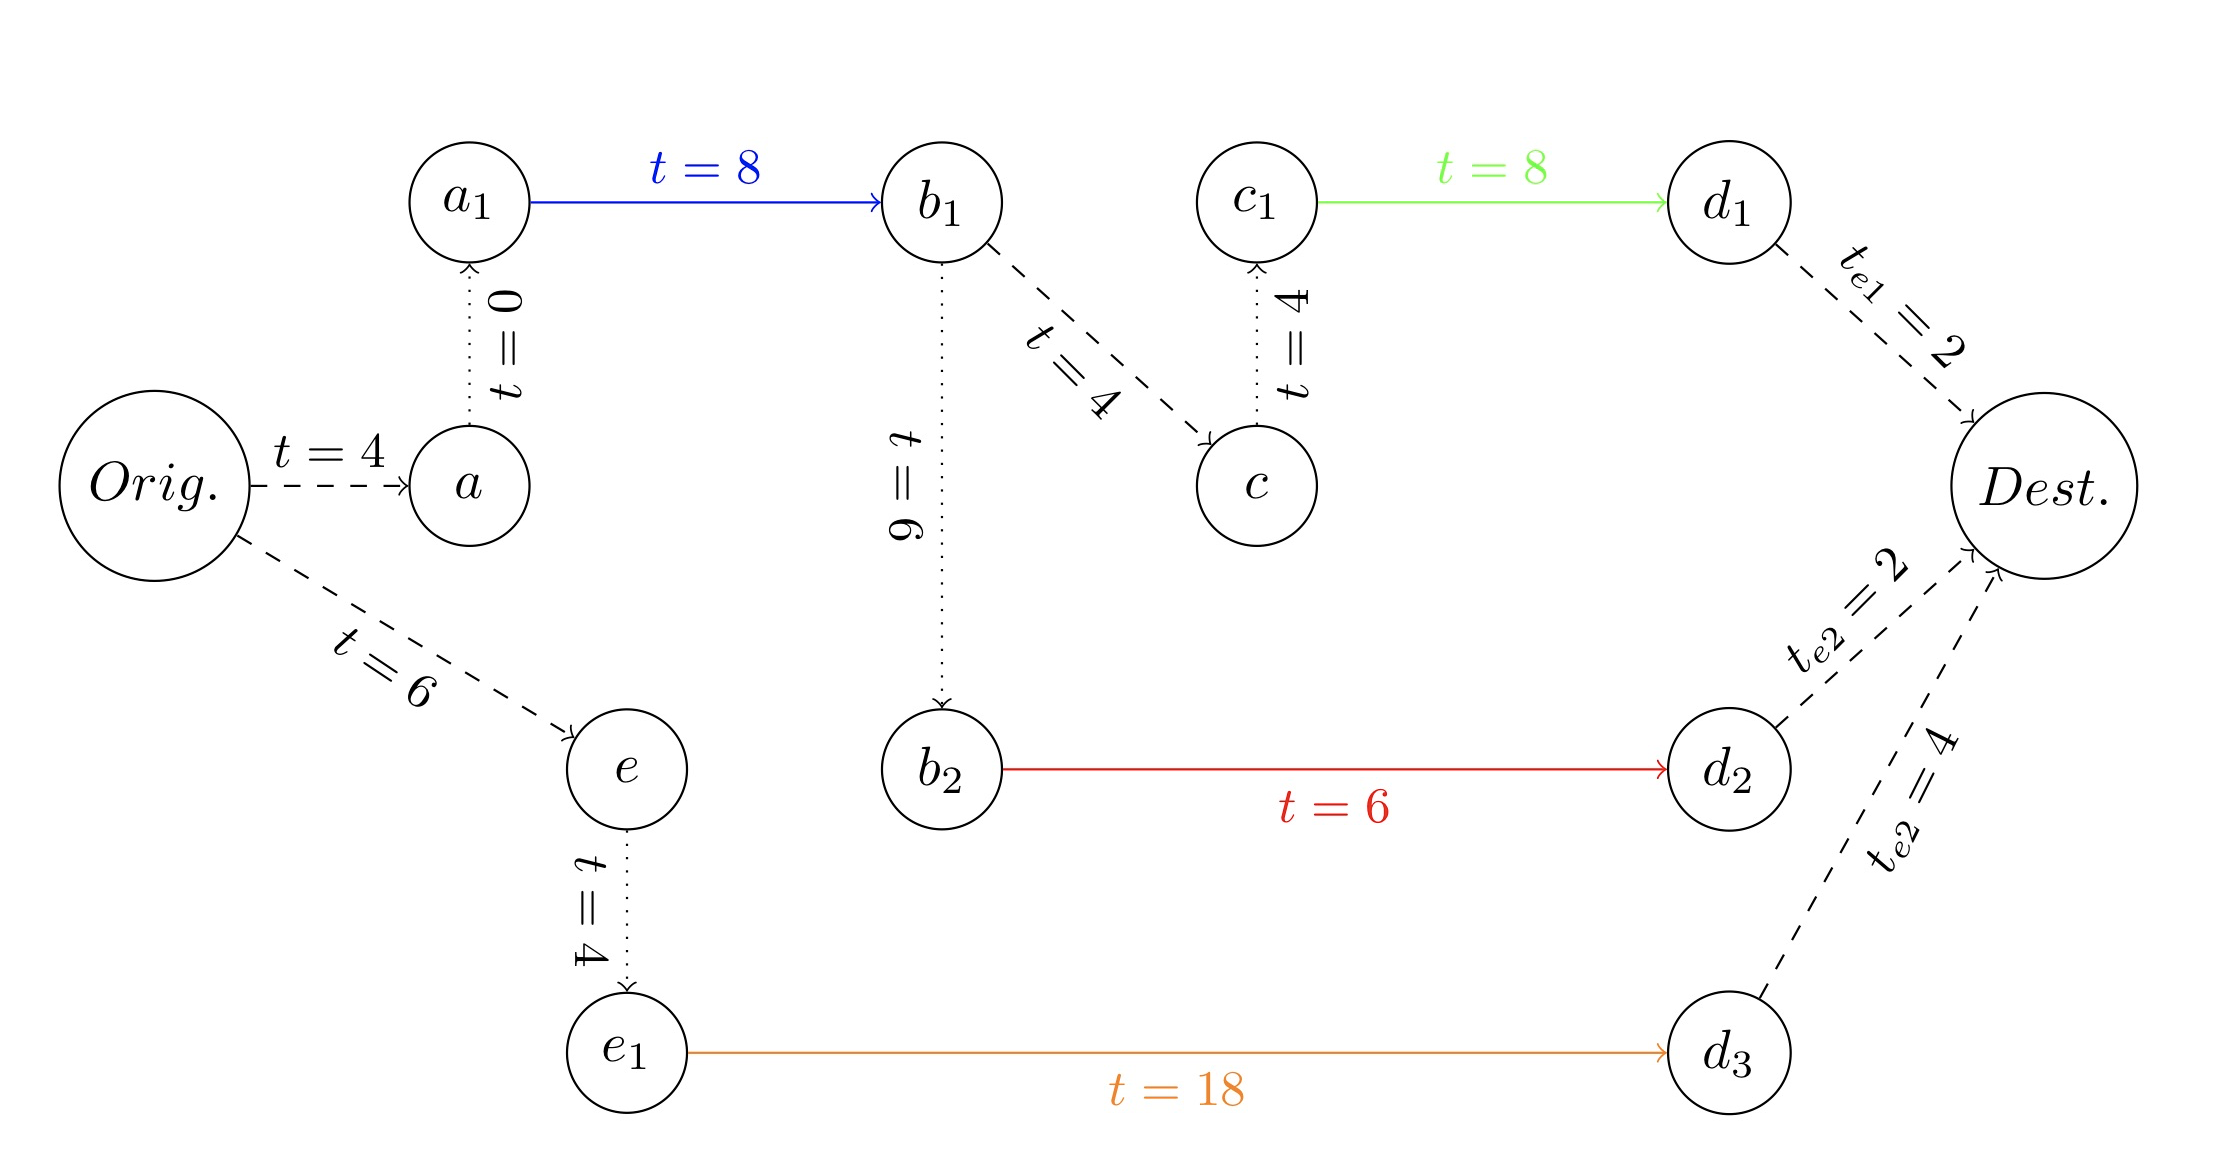

Assuming a path-size coefficient of $w^S=3.0$, the path probabilities with and without path-size correction term will be as follows:
\begin{align*}
\text{wihtout path-size: } & \\
& p_{\pi_1}  = \frac{e^{-0.5(44)}} {e^{-0.5(44)}+e^{-0.5(40)}+e^{-0.5(41)}} = 0.078 & \\
& p_{\pi_2}  = \frac{e^{-0.5(40)}} {e^{-0.5(44)}+e^{-0.5(40)}+e^{-0.5(41)}} = 0.574 & \\
& p_{\pi_3}  = \frac{e^{-0.5(41)}} {e^{-0.5(44)}+e^{-0.5(40)}+e^{-0.5(41)}} = 0.348 & \\
\text{with path-size: } & \\
& p_{\pi_1}  = \frac{e^{-0.5(44-3ln(0.769))}} {e^{-0.5(44-3ln(0.769))}+e^{-0.5(40-3ln(0.769))}+e^{-0.5(41-3ln(1.0))}} = 0.067 & \\
& p_{\pi_2}  = \frac{e^{-0.5(40-3ln(0.769))}} {e^{-0.5(44-3ln(0.769))}+e^{-0.5(40-3ln(0.769))}+e^{-0.5(41-3ln(1.0))}} = 0.492 & \\
& p_{\pi_3}  = \frac{e^{-0.5(41-3ln(1.0))}} {e^{-0.5(44-3ln(0.769))}+e^{-0.5(40-3ln(0.769))}+e^{-0.5(41-3ln(1.0))}} = 0.442 & 
\end{align*}

Other path overlapping models exist in the literature, including those for transit networks, where overlapping may be modeled by shared stops, same route numbers, shared streets, etc. 

## Modeling Congestion
Depending on the amount of demand and route choice behavior, transit vehicles may become congested, in that the number of passengers wanting to board a vehicle being greater than the capacity of the vehicle. Schedule-based transit assignment has the advantage of representing transit vehicles and being able to model vehicle capacity and congestion explicitly. However, the behavioral treatment of congestion is mode complex due to boarding priority, which is explained later. IN general, two possible solutions for congestion modeling can be considered:

 * **Soft capacity constraint**: In this approach, the cost of transit links with congestion increases using a continuous function. This is similar to traffic assignment in which BPR functions are commonly used. This may or may not be realistic depending on implementation. For example, applying high cost to a transit link where it's travel time is constant may reduce flow in subsequent iterations, but would not estimate realistic travel costs.
 *  **Hard capacity constraint**: In this approach, the links with their flow equal to their capacity become unavailable for more passengers. In fact, if the assigned flow to a transit link is more than its capacity, only a certain number of passengers can board the vehicle and some others are considered failed to board. Those failed passengers must be reassigned to paths with available capacity. Available capacity should be defined based on the boarding priority: 1) passengers on-board have priority over boarding passengers, 2) boarding passengers who arrived to the stop earlier have higher priority over the passengers arriving later.


As shown in Fig. 1, after a hyperpath assignment and network loading, congested links are selected and updated for the next iteration of the assignment. The update can be in the form of either increasing the link cost or making the link unavailable. In either case, the problem is mathematically very complex (in reference to traffic assignment problem or frequency-based transit assignment) and existing algorithms cannot solve it for large scale networks \cite{nguyen2001modeling,hamdouch2008schedule}. Approximation algorithms such as the Method of Successive Averages (MSA) may be used to solve the problem, but they do not guarantee to find an optimal solution.

## Assignment
In the example network of Figure 2, calculate the path-size correction term and the probability of selecting each path.